# K-Nearest Neighbors

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
data = pd.read_csv("Data/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## split data to training and test

In [4]:
x = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = data["Species"]

training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [5]:
x_train = training_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
x_test = testing_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]] 

y_train = training_data["Species"]
y_test = testing_data["Species"]

In [6]:
x_train.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
28,5.2,3.4,1.4,0.2
72,6.3,2.5,4.9,1.5


In [7]:
x_test.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
3,4.6,3.1,1.5,0.2


In [8]:
y_train.head(2)

28        Iris-setosa
72    Iris-versicolor
Name: Species, dtype: object

In [9]:
y_test.head(2)

1    Iris-setosa
3    Iris-setosa
Name: Species, dtype: object

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
color = np.where(data['Species'] == 'Iris-setosa', 0, np.where(data['Species'] == 'Iris-versicolor', 1, np.where(data['Species'] == 'Iris-virginica', 2, data['Species'])))

data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

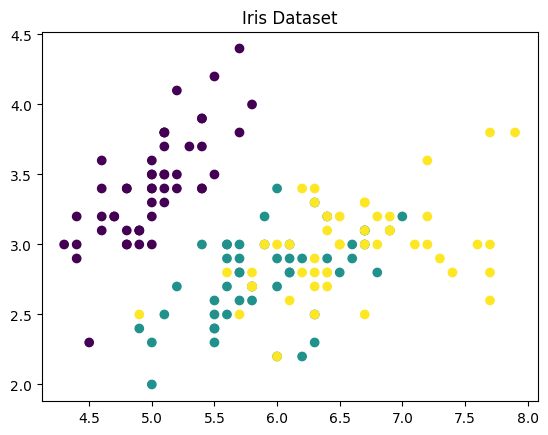

In [12]:
plt.scatter(x["SepalLengthCm"], x["SepalWidthCm"], c=color)

plt.title("Iris Dataset")

plt.show()

In [13]:
class K_Nearest_Neighbors:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
    
    def euclidean_distances(self, x1, x2):
        distances = np.sqrt(np.sum((x2 - x1)**2))
        return distances
    
    def most_common(self, lst):
        return max(set(lst), key=lst.count)
    
    def predict(self, x):
        predict_y_labels = [self._predict(x_test) for x_test in x.to_numpy()]
        return predict_y_labels
    
    def _predict(self, x):
        # compute distances
        distances = [self.euclidean_distances(x, xTrain) for xTrain in self.x_train.to_numpy()]
        # print(np.sort(distances))
        
        # get k nearest neigbors for all samples, labels
        k_indexs = np.argsort(distances)[:self.k]
        # print(k_indexs)
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indexs]
        # print(k_nearest_labels)
        
        # majority vote, most common sample labels
        most_common = self.most_common(k_nearest_labels)
        # print(most_common)
        return most_common
        

In [14]:
def accuracy(predictions, y_test):
    return np.sum(predictions == y_test) / len(y_test)

In [15]:
KNN = K_Nearest_Neighbors(k=3)
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)

print(f"Accuracy: {accuracy(predictions, y_test)}%")

Accuracy: 0.9666666666666667%
